In [24]:
from IPython.display import display
from docplex.mp.model import Model
from time import time
import os
import numpy as np
import math as math
import pandas as pd
import random
import warnings
import skr as skr
import networkx as nx
import matplotlib.pyplot as plt
import time as tm
warnings.filterwarnings("ignore")

In [25]:
from PIL import Image, ImageDraw, ImageFont

def drawing_scheduling(f_aph):

    Tx = {(n,x): [] for x in range(1, max(max_dev_node.values()) + 1) for n in N}
    Rx = {(n,y): [] for y in range(1, max(max_dev_node.values()) + 1) for n in N}
    
    for idx in f_aph.keys():
        if f_aph[idx] == 1:
            color = "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
            Tx[(idx[0],idx[2])].append((idx[4][0],idx[4][1],color))
            Rx[(idx[1],idx[3])].append((idx[4][0],idx[4][1],color))

    # Set the size of each rectangle
    rectangle_size = (1500, 75*len(N)*max(max_dev_node.values()))
    
    # Create an image with a white background
    image_size = (rectangle_size[0], rectangle_size[1])
    image = Image.new("RGB", image_size, "white")
    draw = ImageDraw.Draw(image)

    # Draw text in the first, second and third column
    column_1 = "Node"
    column_2 = "QKD Tx"
    column_3 = "QKD Rx"
    position_column_1 = (25,0)
    position_column_2 = (350,0)
    position_column_3 = (1075,0)
    
    
    # Define font size and load the font
    font_size = 15  # Adjust font size as needed
    font = ImageFont.load_default(font_size)

    # Draw text in the first, second and third column with increased font size
    draw.text(position_column_1, column_1, font=font, fill="black")
    draw.text(position_column_2, column_2, font=font, fill="green")
    draw.text(position_column_3, column_3, font=font, fill="red")

    y_start = 0
    for n in N:
        for idx in range(1,max(max_dev_node.values()) + 1):

            # Draw black lines surrounding subrectangles
            draw.rectangle([80, y_start + 20, 720, y_start + 60], outline="black", width=2)  
            draw.rectangle([780, y_start + 20, 1420, y_start + 60], outline="black", width=2)
            
            # Draw text of nodes
            text_position = (position_column_1[0] + 5, y_start + 25)
            draw.text(text_position, f"{n}.{idx}",font=font, fill="black")
            text_position = (740, y_start + 25)
            draw.text(text_position, f"{n}.{idx}",font=font, fill="black")

            y_start += 70 
            

        draw.line([0, y_start + 10,1500, y_start + 10], fill="black", width=1) 

    y_start = 0
    # Draw rectangles with names and labels
    for n in N:
        for x in range(1,max(max_dev_node.values()) + 1 ):
            if len(Tx[(n,x)]) != 0:
                for it in Tx[(n,x)]:
                    rectangle_x_start_left = 80 + 640*it[0]
                    rectangle_y_start_left = y_start + 20 
                    rectangle_x_end_left = rectangle_x_start_left + 640*(it[1] - it[0])
                    rectangle_y_end_left = y_start + 60
                    draw.rectangle([rectangle_x_start_left, rectangle_y_start_left, rectangle_x_end_left, rectangle_y_end_left], fill=it[2], outline="black", width=2)
                    draw.text((rectangle_x_start_left, rectangle_y_end_left +5), f"{it[0]}", fill="black")
                    draw.text((rectangle_x_end_left, rectangle_y_start_left -10), f"{it[1]}", fill="black")
            y_start += 70

    y_start = 0
    for n in N:    
        for y in range(1,max(max_dev_node.values()) + 1 ):
            if len(Rx[(n,y)]) != 0:
                for it in Rx[(n,y)]:
                    rectangle_x_start_right = 780 + 640*it[0]
                    rectangle_y_start_right = y_start + 20  
                    rectangle_x_end_right = rectangle_x_start_right + 640*(it[1] - it[0])
                    rectangle_y_end_right = y_start + 60
                    draw.rectangle([rectangle_x_start_right, rectangle_y_start_right, rectangle_x_end_right, rectangle_y_end_right], fill=it[2], outline="black", width=2)
                    draw.text((rectangle_x_start_right, rectangle_y_end_right +5), f"{it[0]}", fill="black")
                    draw.text((rectangle_x_end_right, rectangle_y_start_right -10), f"{it[1]}", fill="black")
            y_start += 70                       
        
    # Display the image
    display(image)

Rows: 6, Columns: 6
Number of nodes = 6
N = {0, 1, 2, 3, 4, 5}
Number of edges = 6
E = [(0, 1), (1, 2), (1, 4), (2, 3), (3, 4), (3, 5)]
Longest distance in the network = 80 km
L = {(0, 1): 80, (1, 2): 32, (1, 4): 19, (2, 3): 16, (3, 4): 6, (3, 5): 70}
Maximum degree of the graph: 3
Average degree: 2.0


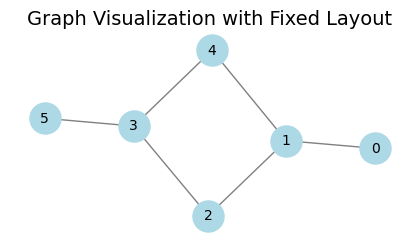

In [26]:
max_value_protocol = 80

# Load the CSV file
absolute_path = "/media/jc-user/My Box/Universidad Carlos III de Madrid/Coding/ONDM2025/network_topologies/"
data = pd.read_csv(absolute_path + "6_nodes_SECOQC.csv", header=None)

# Ensure the data has at least 700 rows and columns
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

# Initialize the set N
N = set()

# Initialize the set E
E = []

# Initialize the set E
L = {}

# Iterate through rows and check
for index, row in data.iterrows():
    # Check if any value in the row is non-zero
    if (row != 0).any():
        N.add(index)
    
    # Check each column value in the current row
    for col_index, value in enumerate(row):
        if value != 0:
            if index < col_index:
                E.append((index, col_index))  # Add the (row, column) tuple to E
                L[(index, col_index)] = value  # Add the (row, column):value tuple to L

# Normalize values in L
max_value = max(L.values())  # Find the maximum value in L

# If the maximum value is greater than 0, normalize it
if max_value > max_value_protocol:
    scaling_factor = max_value_protocol / max_value
    L = {key: round(value * scaling_factor,4) for key, value in L.items()}  # Normalize each value


# Output network data
print("Number of nodes = " +str(len(N)))
print("N = " + str(N))
print("Number of edges = " +str(len(E)))
print("E = " + str(E))
print("Longest distance in the network = " +str(max(L.values())) + " km")
print("L = " + str(L))

# Create the graph
G = nx.Graph()
G.add_nodes_from(N)  # Add nodes
G.add_edges_from(E)  # Add edges

# Find the maximum degree
max_degree = max(dict(G.degree()).values())

print("Maximum degree of the graph:", max_degree)

degrees = dict(G.degree())
avg_degree_calc = sum(degrees.values()) / len(degrees)
print("Average degree:", avg_degree_calc)


# Generate fixed positions
fixed_pos = nx.spring_layout(G, seed=42)  # Use a random seed for consistent layout

# Draw the graph with fixed positions
plt.figure(figsize=(4, 2))
nx.draw(
    G, 
    fixed_pos, 
    with_labels=True, 
    node_color="lightblue", 
    edge_color="gray", 
    node_size=500, 
    font_size=10
)
plt.title("Graph Visualization with Fixed Layout", fontsize=14)
plt.show() 


In [ ]:
print("This code is made for MILP-Based Scheduler for QKDN (MBSQ)")
print("------------------------------------")
print(" ")

#Initializing timing
time_0 = time()

MBSQ_solution = {}

##########-------------------->>>>>>>>>> TOPOLOGIES <<<<<<<<<<---------------------##########
#Initializing variables and sets
SKR_nTDM = {}   #SKR for non TDM QChs  
SKR_TDM = {}    #SKR for switched TDM QChs (worst case, two switches in the QCh)

T = 3600    #Time period for TDM cycle
ts = 180    #Time for switching and recalibration, inherent to QKD devices technology

tf = {edge: 0 for edge in E} #Traffic matrix

#Computing the maximum number of slots 
if T/ts == np.floor(T/ts):
        d_max = T/ts - 1
else:
        d_max = int(np.floor(T/ts))

d_max = int(d_max)

#Computing the SKR for non TDM QChs and TDM QChs
for key, value in L.items():
    SKR_nTDM[key] = skr.compute_skr(value,0,256)
    SKR_TDM[key] = skr.compute_skr(value,2.4,256)

aux_N = N
aux_E = E

mean_skr = np.mean(list(SKR_nTDM.values()))

       
#Setting the values to start the iteration
N = aux_N
E = aux_E

G = nx.Graph()
G.add_nodes_from(N)
G.add_edges_from(E)

#Creating the traffic matrix
tf = {(i,j): round(random.uniform(mean_skr*0.1,mean_skr*0.2)) for (i,j) in E}
print("Traffic matrix:" + str(tf))

#Removing the entire part of the rate Demand/Capacity, this may lead to a different network topo 
aux1 = {}
aux2 = []
direct_pairs = {(i,j): 0 for (i,j) in E}    #The number of non TDM QChs for links
for (i,j) in E:
        #Computing the remainder of non TDM QChs
        remainder_nTDM = round(tf[(i,j)]/SKR_nTDM[(i,j)] - np.floor(tf[(i,j)]/SKR_nTDM[(i,j)]),3)

        #Checking if the remainder using a SKR for TDM plus the contribution of switching is viable to by shared 
        if (SKR_nTDM[(i,j)]/SKR_TDM[(i,j)])*remainder_nTDM + ts/T  > 1:
                direct_pairs[(i,j)] = np.ceil(tf[(i,j)]/SKR_nTDM[(i,j)])     
        
        #If so, then update the corresponding values 
        else:
                aux1[(i,j)] = (SKR_nTDM[(i,j)]/SKR_TDM[(i,j)])*remainder_nTDM
                aux2.append((i,j))
                direct_pairs[(i,j)] = np.floor(tf[(i,j)]/SKR_nTDM[(i,j)])

print("Non swiched QTx-QRx pairs = " + str(direct_pairs))

#Updating the main sets 
tf = aux1.copy()
E = aux2
N = [n for n in N if n in [element for (i,j) in E for element in (i,j)]]

#Building the resulted topo
G = nx.Graph()
G.add_nodes_from(N)
G.add_edges_from(E)

#Computing the maximum number of neighbours nodes for each one
max_dev_node = {n: sum(1 for ng in list(G.neighbors(n))) for n in N}

#Setting the name of each slot
K = np.arange(1, d_max + 1)
        
#Setting the number of Tx for each network node        
X = {n: np.arange(1,max_dev_node[n] + 1) for n in N}

#Setting the number of Rx for each network node
Y = {n: np.arange(1,max_dev_node[n] + 1) for n in N}

#Computing the iterative variables for slots [(n,ng,x,y,k,k_p)]
aux_1 = []
for n in N:
        for x in X[n]:
                for k in K:
                        for ng in list(G.neighbors(n)):
                                for y in Y[ng]:
                                        for k_p in K:
                                                aux_1.append((n,ng,x,y,k,k_p))

aux_2_1 = []
for n in N:
        for x in X[n]:
                aux_2_1.append((n,x,0))
                for k in K:
                        aux_2_1.append((n,x,k))

aux_2_2 = []            
for n in N:
        for y in Y[n]:
                aux_2_2.append((n,y,0))
                for k_p in K:
                        aux_2_2.append((n,y,k_p))
                
aux_3_1 = []
for n in N:
        for x in X[n]:
                aux_3_1.append((n,x))
                
aux_3_2 = []
for n in N:
        for y in Y[n]:
                aux_3_2.append((n,y))  
        
m = Model(name='flexible')

##### Decision variable #####
delta = m.continuous_var_dict(aux_1, name="delta", lb=0, ub=1)
phi = m.binary_var_dict(aux_1, name="phi")

tao_t = m.continuous_var_dict(aux_2_1, name="tao_t", lb=0, ub=1)
tao_r = m.continuous_var_dict(aux_2_2, name="tao_r", lb=0, ub=1)

dx = m.binary_var_dict(aux_3_1, name="dx")
dy = m.binary_var_dict(aux_3_2, name="dy")

##### Objective function #####
m.minimize(m.sum(m.sum(0.5*dx[(n,x)] for x in X[n]) for n in N) + m.sum(m.sum(dy[(n,y)] for y in Y[n]) for n in N))

##### Constraints #####  
for (i,j) in E:
        m.add_constraint(tf[(i,j)] - m.sum(delta[(i,j,x,y,k,k_p)] for k_p in K for k in K for y in Y[j] for x in X[i])
                                - m.sum(delta[(j,i,x,y,k,k_p)] for k_p in K for k in K for y in Y[i] for x in X[j]) <= 0)

for n in N:
        for x in X[n]:
                for k in K:
                        for ng in list(G.neighbors(n)):
                                for y in Y[ng]:
                                        for k_p in K:
                                                m.add_constraint(delta[(n,ng,x,y,k,k_p)] - phi[(n,ng,x,y,k,k_p)] <= 0)

for n in N:
        for x in X[n]:
                for k in K:
                        m.add_constraint(m.sum(phi[(n,ng,x,y,k,k_p)] for ng in list(G.neighbors(n)) for y in Y[ng] for k_p in K) - 1 <= 0)

for n in N:
        for y in Y[n]:
                for k_p in K:
                        m.add_constraint(m.sum(phi[(ng,n,x,y,k,k_p)] for ng in list(G.neighbors(n)) for x in X[ng] for k in K) - 1 <= 0)

for n in N:
        for x in X[n]:
                m.add_constraint(tao_t[(n,x,0)] <= 0)      
                for k in K:
                        m.add_constraint(tao_t[(n,x,k-1)] + m.sum(phi[(n,ng,x,y,k,k_p)]*(ts/T) + delta[(n,ng,x,y,k,k_p)] for ng in list(G.neighbors(n)) for y in Y[ng] for k_p in K) 
                                        - tao_t[(n,x,k)] <= 0)
                        
for n in N:                
        for y in Y[n]:
                m.add_constraint(tao_r[(n,y,0)] <= 0)
                for k_p in K:
                        m.add_constraint(tao_r[(n,y,k_p-1)] + m.sum(phi[(ng,n,x,y,k,k_p)]*(ts/T) + delta[(ng,n,x,y,k,k_p)] for ng in list(G.neighbors(n)) for x in X[ng] for k in K) 
                                        - tao_r[(n,y,k_p)]<= 0)

epsilon = 1e-6
for n in N:
        for x in X[n]:
                for k in K:
                        for ng in list(G.neighbors(n)):
                                for y in Y[ng]:
                                        for k_p in K:
                                                m.add_indicator(phi[(n,ng,x,y,k,k_p)], tao_t[(n,x,k)] - tao_r[(ng,y,k_p)] - epsilon <= 0, 1)
                                                m.add_indicator(phi[(n,ng,x,y,k,k_p)], tao_r[(ng,y,k_p)] - tao_t[(n,x,k)] - epsilon <= 0, 1)

                
for n in N:
        for x in X[n]:
                m.add_constraint(m.sum(phi[(n,ng,x,y,k,k_p)] for ng in list(G.neighbors(n)) for y in Y[ng] for k in K for k_p in K) - d_max*dx[(n,x)] <= 0)
        
for n in N:
        for y in Y[n]:
                m.add_constraint(m.sum(phi[(ng,n,x,y,k,k_p)] for ng in list(G.neighbors(n)) for x in X[ng] for k in K for k_p in K) - d_max*dy[(n,y)] <= 0)

##### Running the model and getting results #####
#m.parameters.timelimit = 7200
sol = m.solve(log_output=True)
gap = round(m.solve_details.mip_relative_gap,3)
#sol.display()
time_f = time()
                        
my_sol =(round(time_f - time_0,3),
        gap,
        sum(direct_pairs.values())*1.5 + 0.5*sum(dx[(n,x)].solution_value for n in N for x in X[n]) + sum(dy[(n,y)].solution_value for n in N for y in Y[n]),
        int(sum(direct_pairs.values())*2 + sum(dx[(n,x)].solution_value for n in N for x in X[n]) + sum(dy[(n,y)].solution_value for n in N for y in Y[n])), 
        int(sum(direct_pairs.values()) + sum(dx[(n,x)].solution_value for n in N for x in X[n])),
        int(sum(direct_pairs.values()) + sum(dy[(n,y)].solution_value for n in N for y in Y[n])))

print("MBSQ solution")
print(f"Sol ==> Runtime: {my_sol[0]},Gap: {my_sol[1]},Cost: {my_sol[2]}, Total: {my_sol[3]}, Tx: {my_sol[4]}, Rx: {my_sol[5]}")
                
MBSQ_solution = my_sol
tm.sleep(5)
print(" ")

        

This code is made for MILP-Based Scheduler for QKDN (MBSQ)
------------------------------------
 
Traffic matrix:{(0, 1): 8, (1, 2): 326, (1, 4): 309, (2, 3): 342, (3, 4): 407, (3, 5): 52}
Non swiched QTx-QRx pairs = {(0, 1): 0.0, (1, 2): 0.0, (1, 4): 0.0, (2, 3): 0.0, (3, 4): 0.0, (3, 5): 0.0}
Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 2 times.
MIP Presolve eliminated 24 rows and 24 columns.
MIP Presolve modified 9720 coefficients.
Aggregator did 4860 substitutions.
Reduced MIP has 19902 rows, 14820 columns, and 87912 nonzeros.
Reduced MIP has 4884 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.12 sec. (304.96 ticks)
Found incumbent of value 18.000000 after 0.15 sec. (341.73 ticks)
Probing time = 0.05 sec. (12.87 ticks)
Tried aggregator 2 times.
MIP Presolve modified 4860 coefficients.
Aggregator did 4860 substitutions.
Reduced MIP has 15042 rows, 9960 columns, and 83052 nonzeros.
Reduced

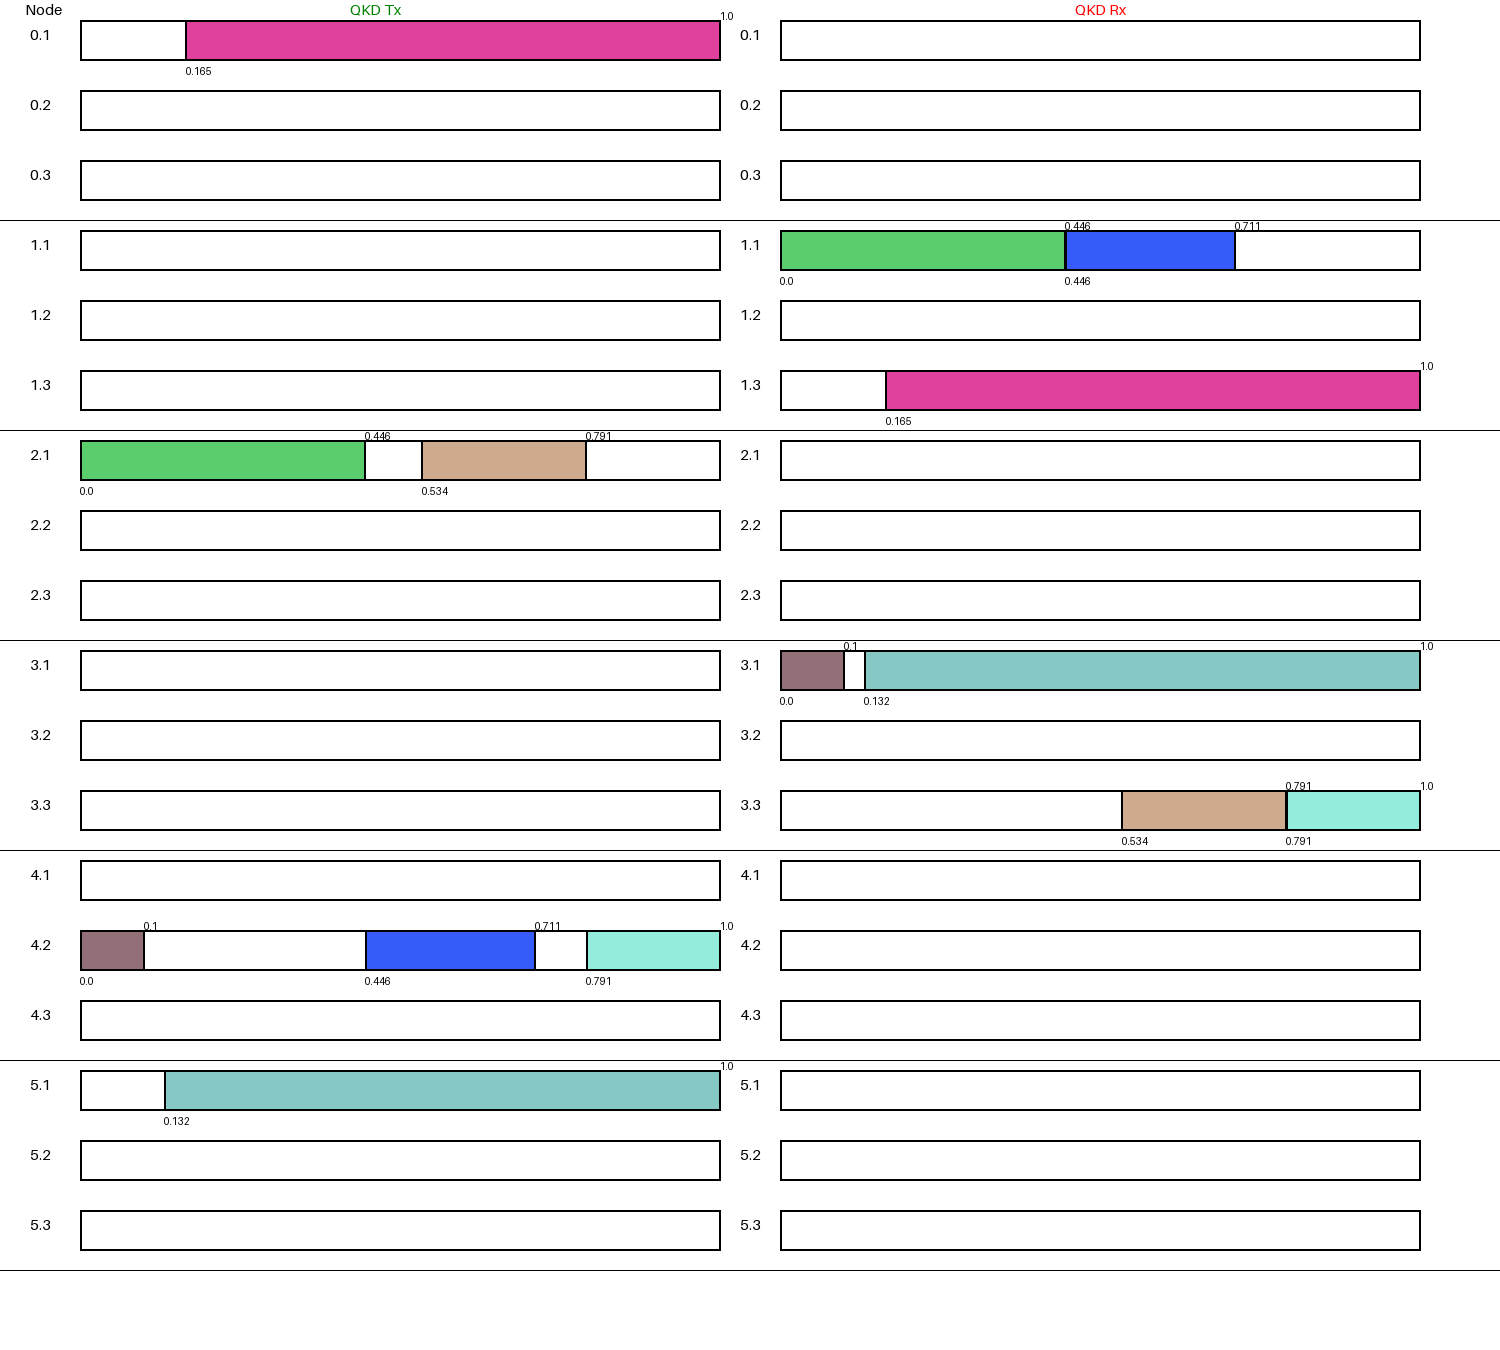

In [28]:
f_aph = {}
for n in N:
    for x in X[n]:
        for k in K:
            for ng in list(G.neighbors(n)):
                for y in Y[ng]:
                    for k_p in K:
                        if phi[(n,ng,x,y,k,k_p)].solution_value > 0:
                            f_aph[(n,ng,x,y,(abs(round(max(tao_t[(n,x,k)].solution_value, tao_r[(ng,y,k_p)].solution_value) - (ts/T) - delta[(n,ng,x,y,k,k_p)].solution_value,3)), 
                                             abs(round(max(tao_t[(n,x,k)].solution_value, tao_r[(ng,y,k_p)].solution_value),3))))] = 1
if len(f_aph) != 0:
    drawing_scheduling(f_aph)